# Проект по SQL

Коронавирус изменил привычный порядок вещей: в свободное время жители городов стали проводить больше времени за книгами, что привело к появлению большого числа приложений для тех, кто любит читать.

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке.

**Задача:** проанализировать базу данных. 

**Цель:** сформулировать предложения для нового продукта.

---
**Описание данных**

**Таблица books** \
Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

**Таблица authors** \
Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

**Таблица publishers** \
Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

**Таблица ratings** \
Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

**Таблица reviews** \
Содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.


<div>
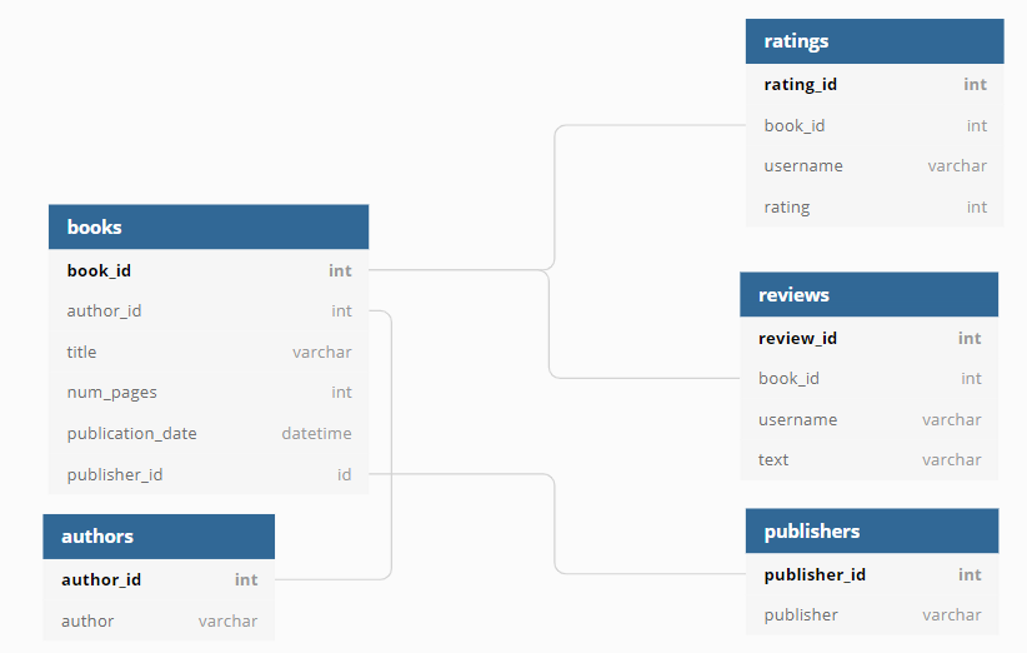
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-к-базе-данных" data-toc-modified-id="Подключение-к-базе-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение к базе данных</a></span></li><li><span><a href="#Исследование-таблиц-(обзор)" data-toc-modified-id="Исследование-таблиц-(обзор)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование таблиц (обзор)</a></span></li><li><span><a href="#Задания" data-toc-modified-id="Задания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Количество-книг-вышедших-после-1-января-2000-года" data-toc-modified-id="Количество-книг-вышедших-после-1-января-2000-года-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество книг вышедших после 1 января 2000 года</a></span></li><li><span><a href="#Количество-обзоров-и-средняя-оценка-для-каждой-книги" data-toc-modified-id="Количество-обзоров-и-средняя-оценка-для-каждой-книги-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество обзоров и средняя оценка для каждой книги</a></span></li><li><span><a href="#Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-(так-были-исключены-из-анализа-брошюры)" data-toc-modified-id="Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-(так-были-исключены-из-анализа-брошюры)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Издательство, которое выпустило наибольшее число книг толще 50 страниц (так были исключены из анализа брошюры)</a></span></li><li><span><a href="#Автор-с-самой-высокой-средней-оценкой-книг-(книги-с-50-и-более-оценками)" data-toc-modified-id="Автор-с-самой-высокой-средней-оценкой-книг-(книги-с-50-и-более-оценками)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Автор с самой высокой средней оценкой книг (книги с 50 и более оценками)</a></span></li><li><span><a href="#Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-48-оценок" data-toc-modified-id="Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-48-оценок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Среднее количество обзоров от пользователей, которые поставили больше 48 оценок</a></span></li></ul></li></ul></div>

## Подключение к базе данных

In [1]:
# Импорт бибилиотек
import pandas as pd
from sqlalchemy import text, create_engine

# Устанавливаем параметры подключения
db_config = {'user': '', # имя пользователя
'pwd': '', # пароль
'host': '',
'port': , # порт подключения
'db': ''} # название базы данных

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# Сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

con=engine.connect()

## Исследование таблиц (обзор)

In [2]:
# Выполняем запросы SQL и получаем информацию о датасетах
for value in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    print('\033[31m' + '______________Выполняем запрос_______________' + '\033[0m')
    print('Название таблицы:', value)
    
    query = '''
    SELECT *
    FROM {}
    LIMIT 5;
    '''.format(value)
    
    df = pd.io.sql.read_sql(query, con = engine)
    display(df)
    
    print('\033[31m' + '______________Дубликаты______________' + '\033[0m')
    print('Дубликаты:', df.duplicated().sum())
    
    print('\033[31m' + '______________Информация о датасете______________' + '\033[0m')
    query = '''
    SELECT * FROM {};
    '''.format(value)
    
    df = pd.io.sql.read_sql(query, con = engine)
    
    print(df.info())
    print('\033[34m' + '_'*50 + '\033[0m')
    print()

______________Выполняем запрос_______________
Название таблицы: books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


______________Дубликаты______________
Дубликаты: 0
______________Информация о датасете______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
__________________________________________________

______________Выполняем запрос_______________
Название таблицы: authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


______________Дубликаты______________
Дубликаты: 0
______________Информация о датасете______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
__________________________________________________

______________Выполняем запрос_______________
Название таблицы: publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


______________Дубликаты______________
Дубликаты: 0
______________Информация о датасете______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
__________________________________________________

______________Выполняем запрос_______________
Название таблицы: ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


______________Дубликаты______________
Дубликаты: 0
______________Информация о датасете______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
__________________________________________________

______________Выполняем запрос_______________
Название таблицы: reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


______________Дубликаты______________
Дубликаты: 0
______________Информация о датасете______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
__________________________________________________



## Задания

### Количество книг вышедших после 1 января 2000 года

In [3]:
# Задание №1
# Выполняем запрос SQL
query = '''
SELECT COUNT(*) AS cnt_books_after_2000
FROM books
WHERE publication_date > '2000-01-01';

'''

pd.io.sql.read_sql(sql=text(query), con = con)

,cnt_books_after_2000
0,819


<div style="border:solid brown 3px; padding: 20px">
<font size="4"><b>Заметка:</b></font>
    
С 1-го января 2000-го года было опубликовано 819 из 1000 книг

### Количество обзоров и средняя оценка для каждой книги

In [4]:
# Задание №2
# Выполняем запрос SQL
query = '''
SELECT
    rat.book_id,
    COUNT(DISTINCT rev.text) as cnt_texts,
    AVG(rat.rating) AS avg_rating
FROM ratings AS rat
INNER JOIN reviews AS rev ON rat.book_id = rev.book_id
GROUP BY rat.book_id
ORDER BY avg_rating DESC, cnt_texts DESC
'''

pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,cnt_texts,avg_rating
0,17,4,5.00
1,553,3,5.00
2,444,3,5.00
3,76,2,5.00
4,993,2,5.00
...,...,...,...
989,915,3,2.25
990,202,3,2.00
991,371,2,2.00
992,316,2,2.00


<div style="border:solid brown 3px; padding: 20px">
<font size="4"><b>Заметка:</b></font>
    
Наибольшая оценка "5".
    
Отсортировав по количеству отзывов совместно с рейтингом узнаем, что на книгу с `id=17` пришлось 4 отзыва

### Издательство, которое выпустило наибольшее число книг толще 50 страниц (так были исключены из анализа брошюры)

In [5]:
# Задание №3
# Выполняем запрос SQL
query = '''
SELECT
    p.publisher,
    COUNT(DISTINCT b.book_id) AS cnt_books

FROM books AS b
INNER JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY b.publisher_id, p.publisher
ORDER BY cnt_books DESC
LIMIT 1;
'''

pd.io.sql.read_sql(sql=text(query), con = con)

,publisher,cnt_books
0,Penguin Books,42


<div style="border:solid brown 3px; padding: 20px">
<font size="4"><b>Заметка:</b></font>
    
Наибольшее число книг выпустило издательство `Penguin Books`

### Автор с самой высокой средней оценкой книг (книги с 50 и более оценками)

In [6]:
# Задание №4
# Выполняем запрос SQL
"""query = '''
WITH 
-- первый подзапрос с псевдонимом books_rating_tab
books_rating_tab AS (
       SELECT 
              author_id,
              COUNT(rat.rating) AS cnt_ratings,
              AVG(rat.rating) AS books_rating
       
       FROM books AS b

       INNER JOIN ratings AS rat ON b.book_id = rat.book_id

       GROUP BY author_id
       
       ORDER BY books_rating 
)

-- основной запрос, в котором указаны псевдонимы для подзапросов
SELECT 
       a.author,
       brt.cnt_ratings,
       brt.books_rating

FROM books_rating_tab AS brt

INNER JOIN authors AS a ON brt.author_id = a.author_id

WHERE cnt_ratings >= 50 

ORDER BY brt.books_rating DESC, brt.cnt_ratings DESC

LIMIT 1;
'''

pd.io.sql.read_sql(sql=text(query), con = con)"""

print('Old_version')

Old_version


In [7]:
# Задание №4
# Выполняем запрос SQL
query = '''
WITH 
-- первый подзапрос с псевдонимом books_rating_tab
books_rating_tab AS (
       SELECT 
              b.book_id,
              author_id,
              COUNT(rat.rating) AS cnt_ratings,
              AVG(rat.rating) AS book_rating
       
       FROM books AS b

       INNER JOIN ratings AS rat ON b.book_id = rat.book_id

       GROUP BY b.book_id, author_id
       
       HAVING COUNT(rat.rating) >= 50 
       
       ORDER BY book_rating DESC, cnt_ratings DESC
)

-- основной запрос, в котором указаны псевдонимы для подзапросов
SELECT 
       a.author_id,
       a.author,
       SUM(brt.cnt_ratings) AS sum_cnt_ratings,
       AVG(brt.book_rating) AS avg_rating

FROM books_rating_tab AS brt

INNER JOIN authors AS a ON brt.author_id = a.author_id

GROUP BY a.author_id, a.author

ORDER BY avg_rating DESC, sum_cnt_ratings DESC

LIMIT 1;
'''

pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author,sum_cnt_ratings,avg_rating
0,236,J.K. Rowling/Mary GrandPré,310.0,4.283844


<div style="border:solid brown 3px; padding: 20px">
<font size="4"><b>Заметка:</b></font>
    
Наибольший сердний рейтинг у писателя `J.K. Rowling/Mary GrandPré`

<div style="border:solid orange 3px; padding: 20px">
<font size="4"><b>? Идея ?</b></font>
    
Можно выяснить также "возраст" (с первой книги до последней + год начала) этого писателя, это позволит оценить также современность стиля, но это уже другое исследование

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [8]:
# Задание №5
# Выполняем запрос SQL
query = '''
WITH 
-- первый подзапрос с псевдонимом #1
cnt_ratings_tab AS (
       SELECT 
              username,
              COUNT(rating) AS cnt_ratings
       
       FROM ratings AS rat

       GROUP BY username
), -- подзапросы разделяют запятыми

-- первый подзапрос с псевдонимом #2
cnt_reviews_tab AS (
       SELECT 
              username,
              COUNT(text) AS cnt_reviews
       
       FROM reviews AS rev

       GROUP BY username
)

-- основной запрос, в котором указаны псевдонимы для подзапросов
SELECT AVG(cnt_reviews_tab.cnt_reviews) AS AVG_number_of_reviews

FROM cnt_ratings_tab LEFT OUTER JOIN cnt_reviews_tab ON cnt_ratings_tab.username = cnt_reviews_tab.username

WHERE cnt_ratings_tab.cnt_ratings > 48;

'''

pd.io.sql.read_sql(sql=text(query), con = con)

,avg_number_of_reviews
0,24.0


<div style="border:solid brown 3px; padding: 20px">
<font size="4"><b>Заметка:</b></font>
    
Среди активно пользующихся платформой пользователей среднее количество оставляемых обзоров составляет 24 шт. 
    
Активно пользующиеся согласно ТЗ - те, кто оставил более 48 оценок.

<div style="border:solid #4e5754 2px; padding: 10px">
<font size="5", color = "black"><b>Итоги:</b></font>  
    
- С 1-го января 2000-го года было опубликовано `819` из 1000 книг;
- Наибольшая оценка "5";
- книга с `id = 17` пришлось 4 отзыва и оценка ` "5" ` - стоит рассмотерть подробнее, узнать жанр, провести исследование касательно жанров книг;
- наибольшее число книг выпустило издательство Penguin Books - стоит рассмотеть продажи книг этого издательства, оценить прибыль относительно других издательств, выявить фаворитов;
- наибольший сердний рейтинг у писателя `J.K. Rowling/Mary GrandPré` - стоит присмотреться к её книгам, выяснить почему они популярны (если популярны) и почему такой рейтинг;
- среди активно пользующихся платформой пользователей среднее количество оставляемых обзоров составляет `24 шт.` (активно пользующиеся согласно ТЗ - те, кто оставил более 48 оценок).